In [68]:
import numpy as np
import pandas as pd
import math
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
%matplotlib inline

# Import yahoo finance libraries
import yfinance as yf

# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

def gen_paths(S0, r, sigma, T, M, I):
    dt = T/M
    paths = np.zeros((M+1,I))
    paths[0] = S0
    for i in range(1,M+1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean())/rand.std()
        paths[i] = paths[i-1] * np.exp((r - 0.5 * sigma **2) * dt + sigma * math.sqrt(dt) * rand)
    return paths

def print_statistics(array):
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30*'-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

def data_retriever(tickers):    
    # Fetch data for multiple fields using comprehension
    stocks= {symbol: pd.DataFrame({'Close' : yf.download(symbol, start='2010-01-01', end='2018-12-31', progress=False)['Adj Close']}) 
                 for symbol in tickers}

    for key in stocks.keys():
        stocks[key]['Returns'] = np.log( stocks[key]['Close'] / stocks[key]['Close'].shift(1) )
    return stocks

def f(x):
    return 1/(np.sqrt(2*np.pi))*math.exp(-0.5*x**2)

tickers = ['VALE3.SA', 'PETR4.SA', 'BRL=X', 'ITSA4.SA']
stocks = data_retriever(tickers)
assets = pd.DataFrame({'VALE3.SA':stocks['VALE3.SA']['Close'],
                       'PETR4.SA':stocks['PETR4.SA']['Close'],
                       'BRL=X':stocks['BRL=X']['Close'],
                       'ITSA4.SA':stocks['ITSA4.SA']['Close']}).dropna()

returns = pd.DataFrame({'VALE3.SA':stocks['VALE3.SA']['Returns'],
                       'PETR4.SA':stocks['PETR4.SA']['Returns'],
                       'BRL=X':stocks['BRL=X']['Returns'],
                       'ITSA4.SA':stocks['ITSA4.SA']['Returns']}).dropna()
x = np.random.standard_normal(10000)
y = np.array([f(i) for i in x])
#plt.plot(x, y, 'o', color='black');

In [74]:
u = gen_paths(100,0.05,0.20,1,252,10)

In [75]:
u.shape

(253, 10)

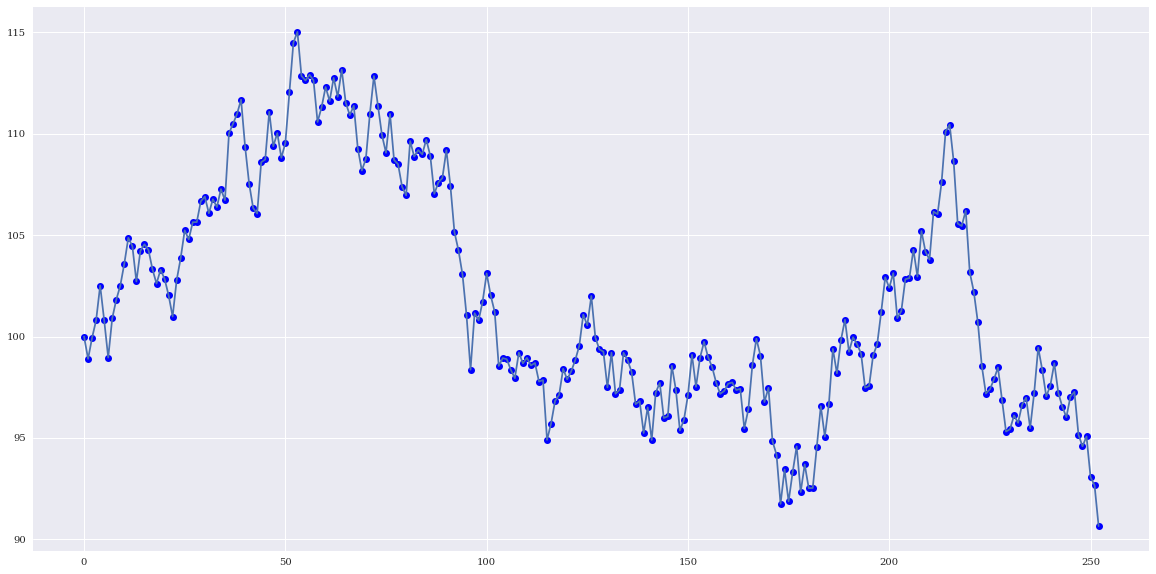

In [108]:
#matlotlib inline
plt.figure(figsize=(20,10))

plt.plot(u[:,4],'bo')
plt.plot(u[:,4])           # plot y using x as index array 0..N-1
plt.plot(u[:,4], 'r+')     # ditto, but with red plusses

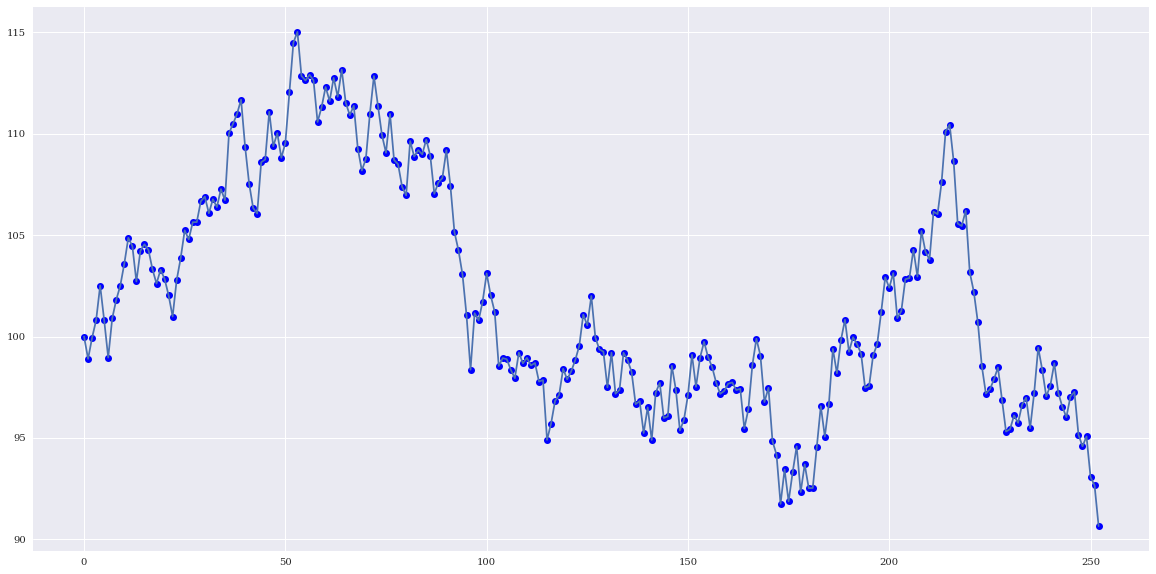

In [107]:
plt.figure(figsize=(20,10))
plt.plot(u[:,4],'bo')
plt.plot(u[:,4])           # plot y using x as index array 0..N-1
plt.plot(u[:,4], 'r+')     # ditto, but with red plusses